In [70]:
import numpy as np
import pandas as pd
import json
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

# TODO do away with the stored json file and create it specifically for the notebook from the DB each time notebook is run
# conn = sqlite3.connect('parsed_links.sqlite')
# cur = conn.cursor()
# json_spec = pd.read_sql_query('SELECT id, json FROM Urls', conn)
# df = pd.DataFrame(json_spec)
# # df.set_index('id', inplace=True)
# df.head()

In [71]:
# display all columns in the dataframe
pd.set_option('display.max_columns', None)

# load data from the json file
df_pre = pd.read_json('all_properties.json', orient='index', convert_axes=False)
df_pre = df_pre.set_index('Listing Number')
df_pre.head()

,Listing Type,Suburb,City,Province,Price,Blurb,Type of Property,Listing Date,Erf Size,Bedrooms,Bathrooms,Kitchens,Lounges,Parking,Outbuilding,Outside Toilets,Lifestyle,Floor Size,Rates and Taxes,Kitchen,Facing,Roof,Wall,Floor,Security,Pets Allowed,Bedroom 1,Bedroom 2,Bathroom,Lounge,Gardens,Standalone Building,Description,Price per m²,Bedroom 3,Dining Room,Garage,Pool,Levies,Family/TV Room,Garden,Special Feature,Garage 1,Garage 2,Garage 3,Family/TV Rooms,Furnished,Nearby Public Transport,Wheelchair Accessible,Occupation Date,Reception Rooms,Special Levy,No Transfer Duty,Lease Period,Bedroom,Deposit Requirements,Rooms,Domestic Rooms,Entrance Hall,Flatlet,Other,Bedroom 4,Parking 1,Parking 2,Floor Number,Style,Window,Number of floors,Special Features,Internet Access,Generator,Backup Water,Dining Rooms,Bathroom 1,Bathroom 2,Office/study,Bedroom 5,Bedroom 6,Entrance Halls,Special Featuress,Age,Braai Room,Coverage,Secure Parking,Zoning,Common Toilets,Temperature Control,Height Restriction,Pools,Size of Outbuildings,Price Per Parking,Parking 3,Office,Outbuildings,Bars,Office/studies,Other 1,Other 2,Special Features 1,Special Features 2,Special Features 3,Special Features 4,Bathroom 3,Temperature Controls,Special Features 5,Loft,Kitchen 1,Kitchen 2,Lounge 1,Lounge 2,Braai Rooms,Braai Room 1,Braai Room 2,Security 1,Security 2,Parking 4,Other 3,Parking 5,Parking 6,Outbuilding 1,Outbuilding 2,Flat Description,Family/TV Room 1,Family/TV Room 2
Listing Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
112637018,for-sale,la-rochelle,johannesburg,gauteng,R 499 000,2 Bedroom House for sale in La Rochelle,House,09 May 2023,140 m²,2.0,1.0,1.0,1.0,1,Outside Toilets,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112636963,for-sale,mamelodi-east,pretoria,gauteng,R 890 000,3 Bedroom House for sale in Mamelodi East,House,09 May 2023,420 m²,3.0,2.0,NaN,NaN,Parking features,NaN,NaN,Suburban,65 m²,R 408,Laundry,West,"Tile, Insulation",Plaster,Tiled Floors,"Electric Gate, Perimeter Wall",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112637711,for-sale,lenasia-south,johannesburg,gauteng,R 600 000,2 Bedroom House for sale in Lenasia South,House,09 May 2023,NaN,2.0,NaN,NaN,NaN,"Visitors Parking, Carport",NaN,NaN,NaN,481 m²,R 261,"Tiled Floors, Curtain Rails",NaN,NaN,NaN,NaN,"Burglar Bars, Perimeter Wall",Yes,"Tiled Floors, Curtain Rails, Built-in Cupboard...","Tiled Floors, Curtain Rails, Single Bed","Tiled Floors, Bath, Toilet and Basin","Tiled Floors, Curtain Rails",1.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112637556,for-sale,waterkloof,pretoria,gauteng,R 990 000,3 Bedroom Apartment / flat for sale in Waterkloof,Apartment / Flat,09 May 2023,NaN,3.0,2.0,NaN,NaN,2,NaN,NaN,"Complex, Security Complex",81 m²,NaN,,NaN,NaN,NaN,NaN,Security Gate,No,,,NaN,,NaN,NaN,First Floor,R 12 222,,,,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [72]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 112637018 to 112705968
Columns: 124 entries, Listing Type to Family/TV Room 2
dtypes: float64(24), object(100)
memory usage: 1.1+ MB


### Structure df so that only columns that are most likely to contain data remain for now

In [73]:
df_nulls = df_pre.isnull().sum().sort_values()
df_nulls.head(10)

Listing Type          0
Suburb                0
City                  0
Province              0
Price                 0
Blurb                 0
Type of Property      0
Bathrooms           266
Bedrooms            281
Parking             371
dtype: int64

In [74]:
# List of columns to keep
columns_to_keep = ['Listing Type', 'Suburb', 'City', 'Province', 'Price', 'Blurb', 'Type of Property', 'Bathrooms', 'Bedrooms']

# Drop all columns except the specified list
df = df_pre[columns_to_keep]
df

,Listing Type,Suburb,City,Province,Price,Blurb,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,,,,,
112637018,for-sale,la-rochelle,johannesburg,gauteng,R 499 000,2 Bedroom House for sale in La Rochelle,House,1.0,2.0
112636963,for-sale,mamelodi-east,pretoria,gauteng,R 890 000,3 Bedroom House for sale in Mamelodi East,House,2.0,3.0
112637711,for-sale,lenasia-south,johannesburg,gauteng,R 600 000,2 Bedroom House for sale in Lenasia South,House,NaN,2.0
112637556,for-sale,waterkloof,pretoria,gauteng,R 990 000,3 Bedroom Apartment / flat for sale in Waterkloof,Apartment / Flat,2.0,3.0
112636967,for-sale,annlin,pretoria,gauteng,R 899 000,2 Bedroom Townhouse for sale in Annlin,Townhouse,1.5,2.0
...,...,...,...,...,...,...,...,...,...
112709510,for-sale,tamboerskloof,cape-town,western-cape,R 850 000,1 Bedroom Apartment / flat for sale in Tamboer...,Apartment / Flat,NaN,NaN
112697050,to-rent,waterkloof,pretoria,gauteng,R 11 000,2 Bedroom Apartment / flat to rent in Waterkloof,Apartment / Flat,NaN,2.0
112691419,to-rent,salt-river,cape-town,western-cape,R 14 500,3 Bedroom Apartment / flat to rent in Salt River,Apartment / Flat,1.0,3.0


**Check for NaN values**

In [77]:
# check for bedroom NaNs and replace

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # Access the values in each row using column names
    bedroom_value = row['Bedrooms']
    blurb_value = row['Blurb'].split()
    bed_count = blurb_value[0]
    try:
        # bedroom number is 1st character in string so simple index slice and cast to float
        bedrooms = float(bed_count)
    except:
        bedrooms = 0

    # Check if a value is NaN using pd.isna()
    if pd.isna(bedroom_value):
        df.at[index, 'Bedrooms'] = bedrooms
  
# if any bathroom NaN then drop the row
df.dropna(subset=['Bathrooms'], inplace=True)

# drop blurb
df.drop('Blurb',axis=1, inplace=True)
        
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 901 entries, 112637018 to 112705968
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Listing Type      901 non-null    object 
 1   Suburb            901 non-null    object 
 2   City              901 non-null    object 
 3   Province          901 non-null    object 
 4   Price             901 non-null    object 
 5   Type of Property  901 non-null    object 
 6   Bathrooms         901 non-null    float64
 7   Bedrooms          901 non-null    float64
dtypes: float64(2), object(6)
memory usage: 63.4+ KB
None


C:\Users\Margie\AppData\Local\Temp\ipykernel_14500\1313880952.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Bathrooms'], inplace=True)
C:\Users\Margie\AppData\Local\Temp\ipykernel_14500\1313880952.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Blurb',axis=1, inplace=True)


,Listing Type,Suburb,City,Province,Price,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,,,,
112637018,for-sale,la-rochelle,johannesburg,gauteng,R 499 000,House,1.0,2.0
112636963,for-sale,mamelodi-east,pretoria,gauteng,R 890 000,House,2.0,3.0
112637556,for-sale,waterkloof,pretoria,gauteng,R 990 000,Apartment / Flat,2.0,3.0
112636967,for-sale,annlin,pretoria,gauteng,R 899 000,Townhouse,1.5,2.0
112637405,for-sale,montana,pretoria,gauteng,R 829 000,Apartment / Flat,2.0,2.0


In [79]:
df[df['Bedrooms']==0.5]

,Listing Type,Suburb,City,Province,Price,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,,,,
112637497,for-sale,city-and-suburban,johannesburg,gauteng,R 590 000,Apartment / Flat,1.0,0.5
110067087,to-rent,bellevue,johannesburg,gauteng,R 1 458,House,1.0,0.5
112642438,to-rent,berea,johannesburg,gauteng,R 1 800,Apartment / Flat,1.0,0.5
111163550,to-rent,rietfontein,pretoria,gauteng,R 3 900,House,1.0,0.5
112586892,for-sale,cape-town-city-centre,cape-town,western-cape,R 950 000,Apartment / Flat,1.0,0.5
112648802,for-sale,greencreek-lifestlye-estate,pretoria,gauteng,R 580 000,Apartment / Flat,1.0,0.5
112648792,for-sale,rondebosch,cape-town,western-cape,R 1 000 000,Apartment / Flat,1.0,0.5
112623106,to-rent,zonnebloem,cape-town,western-cape,R 6 800,Apartment / Flat,1.0,0.5
112653838,for-sale,braamfontein,johannesburg,gauteng,R 350 000,Apartment / Flat,1.0,0.5


In [80]:
df[df['Price'].str.contains("A")]

,Listing Type,Suburb,City,Province,Price,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,,,,
112653919,for-sale,sinoville,pretoria,gauteng,POA,House,3.0,5.0
112683711,for-sale,newlands,johannesburg,gauteng,POA,House,1.0,3.0
112695014,for-sale,sunnyside,pretoria,gauteng,POA,Apartment / Flat,1.0,2.0
112700824,for-sale,gardens,cape-town,western-cape,POA,House,1.0,3.0


In [81]:
# validate price data
# Drop rows where the length of 'price' is less than 4
df = df[df['Price'].str.len() >= 4]


In [82]:

# clean price values by removing currency symbol and spaces then cast as int
df['Price'] = df['Price'].str.slice(start=2).str.replace(" ", "").astype('int64')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 897 entries, 112637018 to 112705968
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Listing Type      897 non-null    object 
 1   Suburb            897 non-null    object 
 2   City              897 non-null    object 
 3   Province          897 non-null    object 
 4   Price             897 non-null    int64  
 5   Type of Property  897 non-null    object 
 6   Bathrooms         897 non-null    float64
 7   Bedrooms          897 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 63.1+ KB
None


C:\Users\Margie\AppData\Local\Temp\ipykernel_14500\350320937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.slice(start=2).str.replace(" ", "").astype('int64')


,Listing Type,Suburb,City,Province,Price,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,,,,
112637018,for-sale,la-rochelle,johannesburg,gauteng,499000,House,1.0,2.0
112636963,for-sale,mamelodi-east,pretoria,gauteng,890000,House,2.0,3.0
112637556,for-sale,waterkloof,pretoria,gauteng,990000,Apartment / Flat,2.0,3.0
112636967,for-sale,annlin,pretoria,gauteng,899000,Townhouse,1.5,2.0
112637405,for-sale,montana,pretoria,gauteng,829000,Apartment / Flat,2.0,2.0


In [83]:
df.isna().sum()

Listing Type        0
Suburb              0
City                0
Province            0
Price               0
Type of Property    0
Bathrooms           0
Bedrooms            0
dtype: int64

### Split Rental from For Sale

In [84]:
# all rentals have prices <=15000
df_rentals = df.copy()
df_rentals = df_rentals[df_rentals['Listing Type'] == 'to-rent']
df_rentals


,Listing Type,Suburb,City,Province,Price,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,,,,
112636977,to-rent,montana,pretoria,gauteng,9600,Townhouse,2.0,2.0
112637161,to-rent,melrose-north,johannesburg,gauteng,13000,Apartment / Flat,2.0,3.0
112637643,to-rent,parktown,johannesburg,gauteng,12000,Apartment / Flat,1.5,2.0
112637014,to-rent,montana,pretoria,gauteng,7359,Townhouse,1.0,1.0
112637199,to-rent,glenhazel,johannesburg,gauteng,11500,House,2.0,3.0
...,...,...,...,...,...,...,...,...
112710221,to-rent,rondebosch,cape-town,western-cape,11000,Apartment / Flat,1.0,1.0
112710258,to-rent,kensington,johannesburg,gauteng,4500,Apartment / Flat,1.0,1.0
112706157,to-rent,the-hills-game-reserve-estate,pretoria,gauteng,12500,Apartment / Flat,2.0,3.0


In [96]:
df_rentals.describe()

,Price,Bathrooms,Bedrooms
count,475.000000,475.000000,475.000000
mean,9093.987368,1.412632,1.940000
std,3411.691094,0.520921,0.893058
min,1458.000000,1.000000,0.000000
25%,6550.000000,1.000000,1.000000
50%,8500.000000,1.000000,2.000000
75%,12000.000000,2.000000,3.000000
max,15000.000000,3.000000,5.000000


In [86]:
# create sales df
df_sales = df.copy()
df_sales = df_sales[df_sales['Listing Type'] == 'for-sale']
df_sales

,Listing Type,Suburb,City,Province,Price,Type of Property,Bathrooms,Bedrooms
Listing Number,,,,,,,,
112637018,for-sale,la-rochelle,johannesburg,gauteng,499000,House,1.0,2.0
112636963,for-sale,mamelodi-east,pretoria,gauteng,890000,House,2.0,3.0
112637556,for-sale,waterkloof,pretoria,gauteng,990000,Apartment / Flat,2.0,3.0
112636967,for-sale,annlin,pretoria,gauteng,899000,Townhouse,1.5,2.0
112637405,for-sale,montana,pretoria,gauteng,829000,Apartment / Flat,2.0,2.0
...,...,...,...,...,...,...,...,...
112709664,for-sale,eikenhof,johannesburg,gauteng,645000,Apartment / Flat,1.0,2.0
112710208,for-sale,doornpoort,pretoria,gauteng,795000,Townhouse,1.0,2.0
112709276,for-sale,garsfontein,pretoria,gauteng,485000,House,1.0,0.0


## Export to Excel

In [87]:
df_sales.describe()

,Price,Bathrooms,Bedrooms
count,422.000000,422.00000,422.000000
mean,709770.874408,1.31872,2.199052
std,201056.174267,0.47723,1.148974
min,8500.000000,1.00000,0.000000
25%,571250.000000,1.00000,2.000000
50%,749000.000000,1.00000,2.000000
75%,870000.000000,2.00000,3.000000
max,1000000.000000,3.00000,12.000000


In [88]:
df_sales.to_excel('property_database.xlsx')

In [89]:
# Calculate the value counts for the 'Suburb' column
suburb_counts = df_sales['Suburb'].value_counts()

# Create a new DataFrame with the suburb counts
suburb_counts_df = pd.DataFrame({'Suburb': suburb_counts.index, 'Count': suburb_counts.values})

# Sort the DataFrame by the count column in descending order
sorted_df = suburb_counts_df.sort_values('Count', ascending=False)

# Display the sorted DataFrame
sorted_df_sales = suburb_counts_df[suburb_counts_df['Count'] >= 4 ]

sorted_df_sales

,Suburb,Count
0,sunnyside,17
1,arcadia,13
2,montana,13
3,sinoville,13
4,lotus-gardens,13
5,annlin,12
6,pretoria-north,12
7,doornpoort,11
8,pretoria-central,10
9,lenasia-south,8


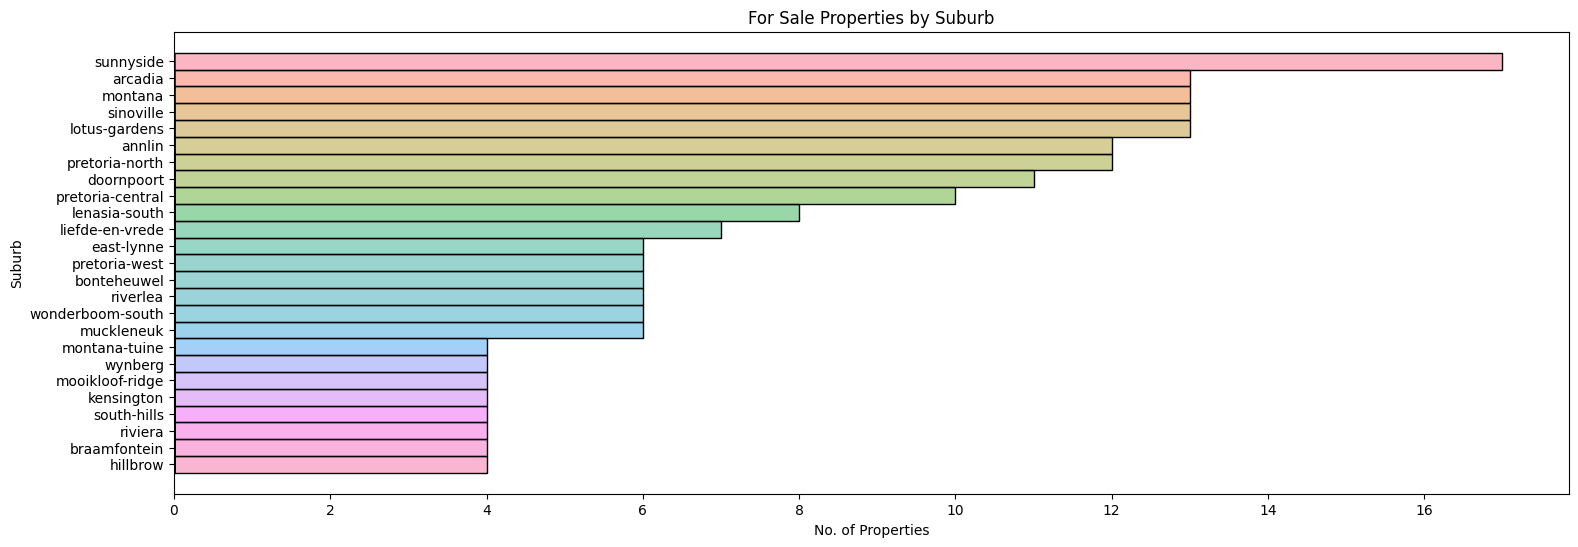

In [90]:
# Create the histogram plot
plt.figure(figsize=(18, 6))  # Set the figure size

# Customize the histogram appearance using Seaborn
sns.histplot(data=sorted_df_sales, 
             y='Suburb',
             weights= 'Count',
             hue='Suburb', 
             edgecolor='black', 
             legend=False
            )

# plt.yticks(labelsize=10)
plt.yticks(linespacing=100)

# Add labels and title
plt.ylabel('Suburb')
plt.xlabel('No. of Properties')
plt.title('For Sale Properties by Suburb')

# Show the plot
plt.show()

In [91]:
# Calculate the value counts for the 'Suburb' column
suburb_counts = df_rentals['Suburb'].value_counts()

# Create a new DataFrame with the suburb counts
suburb_counts_df = pd.DataFrame({'Suburb': suburb_counts.index, 'Count': suburb_counts.values})

# Sort the DataFrame by the count column in descending order
sorted_df = suburb_counts_df.sort_values('Count', ascending=False)

# Display the sorted DataFrame
sorted_df_rentals = suburb_counts_df[suburb_counts_df['Count'] >= 3 ]

sorted_df_rentals

,Suburb,Count
0,montana,17
1,annlin,12
2,pretoria-north,10
3,cape-town-city-centre,9
4,rosebank,8
...,...,...
56,sunnyside,3
57,gardens,3
58,hazeldean,3
59,zonnebloem,3


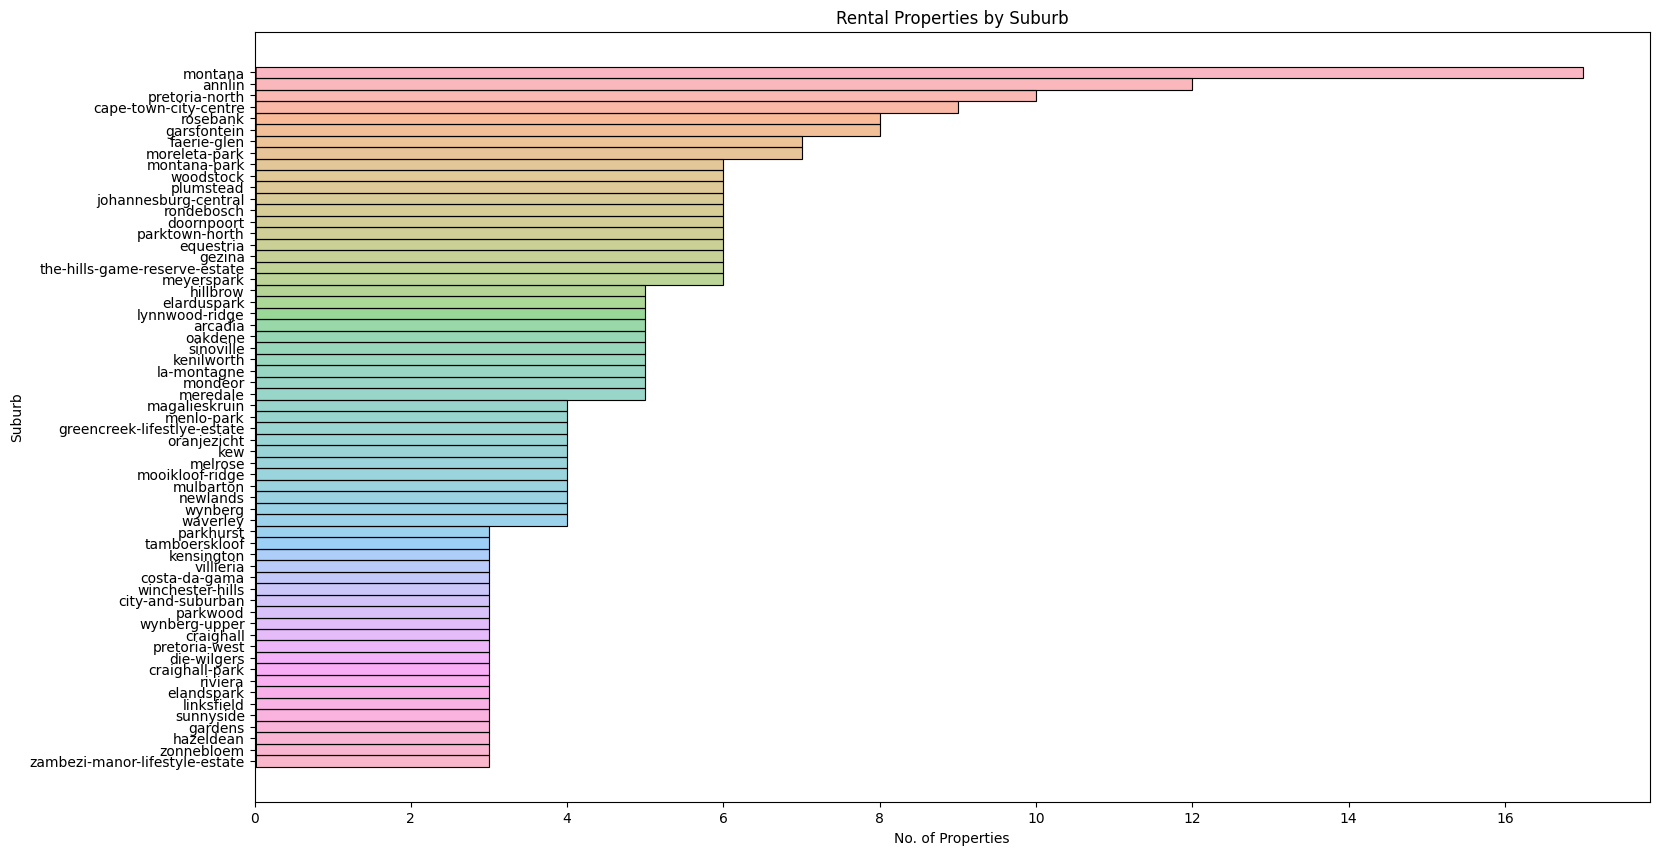

In [92]:
# Create the histogram plot
plt.figure(figsize=(18, 10))  # Set the figure size

# Customize the histogram appearance using Seaborn
sns.histplot(data=sorted_df_rentals, 
             y='Suburb',
             weights= 'Count',
             hue='Suburb', 
             edgecolor='black', 
             legend=False
            )

# plt.yticks(labelsize=10)
plt.yticks(linespacing=100)

# Add labels and title
plt.ylabel('Suburb')
plt.xlabel('No. of Properties')
plt.title('Rental Properties by Suburb')

# Show the plot
plt.show()

In [93]:
# create dataframe to compare sale stock to rental stock

# rename count columns
sorted_df_sales = sorted_df_sales.rename(columns={'Count': 'For Sale'})
sorted_df_rentals = sorted_df_rentals.rename(columns={'Count': 'Rentals'})

df_comp = sorted_df_rentals.merge(sorted_df_sales)
df_comp

,Suburb,Rentals,For Sale
0,montana,17,13
1,annlin,12,12
2,pretoria-north,10,12
3,doornpoort,6,11
4,hillbrow,5,4
5,arcadia,5,13
6,sinoville,5,13
7,mooikloof-ridge,4,4
8,wynberg,4,4
9,kensington,3,4
